In [1]:
import datetime
import importlib

import pdb 
from alive_progress import alive_bar

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import pyadcirc.data.noaa as noaa

In [3]:
%matplotlib ipympl

In [4]:
importlib.reload(noaa)

<module 'pyadcirc.data.noaa' from '/home/jovyan/work/repos/pyadcirc/src/pyadcirc/data/noaa.py'>

# NOAA Library Basics

## Getting list of stations

In [5]:
noaa.NOAA_STATIONS

,Region,ID,Name
0,Alabama,8732828,"Weeks Bay, Mobile Bay"
1,Alabama,8735180,"Dauphin Island, AL"
2,Alabama,8735391,"Dog River Bridge, AL"
3,Alabama,8735523,"East Fowl River Bridge, AL"
4,Alabama,8736897,"Coast Guard Sector Mobile, AL"
...,...,...,...
289,Washington,9445958,"Bremerton, WA"
290,Washington,9446484,"Tacoma, WA"
291,Washington,9447130,"Seattle, WA"
292,Washington,9449424,"Cherry Point, WA"


Filtering by region

In [5]:
ak_stations = noaa.NOAA_STATIONS[noaa.NOAA_STATIONS["Region"] == "Alaska"]
ak_stations

,Region,ID,Name
9,Alaska,9450460,"Ketchikan, AK"
10,Alaska,9451054,"Port Alexander, AK"
11,Alaska,9451600,"Sitka, AK"
12,Alaska,9452210,"Juneau, AK"
13,Alaska,9452400,"Skagway, Taiya Inlet, AK"
14,Alaska,9452634,"Elfin Cove, AK"
15,Alaska,9453220,"Yakutat, Yakutat Bay, AK"
16,Alaska,9454050,"Cordova, AK"
17,Alaska,9454240,"Valdez, AK"
18,Alaska,9455090,"Seward, AK"


Can also use the cli:

In [3]:
!noaa_data --help

Usage: noaa_data [OPTIONS] COMMAND [ARGS]...

  Commands for interacting with the NOAA API

Options:
  --help  Show this message and exit.

Commands:
  find-events  Find storm surge events
  get          Get a product over a date range at particular station:
  info         Info on available products
  stations     Info on available products


In [88]:
!noaa_data stations -r Alaska

    _   ______  ___    ___       __________        ____  ____  _____
   / | / / __ \/   |  /   |     / ____/ __ \      / __ \/ __ \/ ___/
  /  |/ / / / / /| | / /| |    / /   / / / /_____/ / / / /_/ /\__ \ 
 / /|  / /_/ / ___ |/ ___ |   / /___/ /_/ /_____/ /_/ / ____/___/ / 
/_/ |_/\____/_/  |_/_/  |_|   \____/\____/      \____/_/    /____/  
                                                                    

See https://tidesandcurrents.noaa.gov/ for more on stations and available products at each.
+---------+----------------------------------+--------+
|    ID   |               Name               | Region |
+---------+----------------------------------+--------+
| 9450460 |          Ketchikan, AK           | Alaska |
| 9451054 |        Port Alexander, AK        | Alaska |
| 9451600 |            Sitka, AK             | Alaska |
| 9452210 |            Juneau, AK            | Alaska |
| 9452400 |     Skagway, Taiya Inlet, AK     | Alaska |
| 9452634 |          Elfin Cove, AK          

## Getting station metadata

In [89]:
# pandas dataframe - index using iloc if not searching on index key
first_station = ak_stations.iloc[0]
first_station["ID"]

9450460

In [90]:
noaa.get_station_metadata(int(first_station["ID"]))

{'name': 'Ketchikan', 'id': 9450460, 'coords': [228.373889, 55.331944]}

In [4]:
!noaa_data get -p metadata 9450460

    _   ______  ___    ___       __________        ____  ____  _____
   / | / / __ \/   |  /   |     / ____/ __ \      / __ \/ __ \/ ___/
  /  |/ / / / / /| | / /| |    / /   / / / /_____/ / / / /_/ /\__ \ 
 / /|  / /_/ / ___ |/ ___ |   / /___/ /_/ /_____/ /_/ / ____/___/ / 
/_/ |_/\____/_/  |_/_/  |_|   \____/\____/      \____/_/    /____/  
                                                                    

id,name,Longitude,Latitude
9450460,Ketchikan,228.373889,55.331944


## Station URL

We can explore the station at the following link:

https://tidesandcurrents.noaa.gov/stationhome.html?id=9450460

In [6]:
station_link = (
    f"https://tidesandcurrents.noaa.gov/stationhome.html?id={9450460}"
)
station_link

'https://tidesandcurrents.noaa.gov/stationhome.html?id=9450460'

## Getting station data

Lets see the main function that does this:

In [7]:
nome = 9468756
noaa.get_station_metadata(nome)

{'name': 'Nome, Norton Sound',
 'id': 9468756,
 'coords': [194.560361, 64.494611]}

In [8]:
begin_date = "2022-09-01 00:00:00"
end_date = "2022-11-01 00:00:00"
nome_data = noaa.pull_dataset(nome, begin_date=begin_date, end_date=end_date)

In [9]:
nome_data

,Sigma,Water Level,Prediction
Date Time,,,
2022-09-01 00:00:00,0.012,0.425,0.011
2022-09-01 00:06:00,0.012,0.429,0.004
2022-09-01 00:12:00,0.013,0.420,-0.003
2022-09-01 00:18:00,0.010,0.408,-0.011
2022-09-01 00:24:00,0.015,0.400,-0.018
...,...,...,...
2022-10-31 23:30:00,0.004,0.177,0.021
2022-10-31 23:36:00,0.004,0.179,0.021
2022-10-31 23:42:00,0.005,0.174,0.021


<AxesSubplot: xlabel='Date Time'>

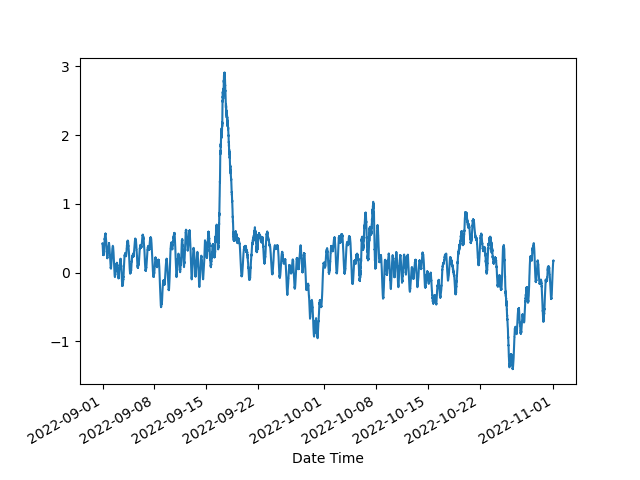

In [10]:
fig = plt.figure()
nome_data["Water Level"].plot()

## Wicks Algo Breakdown

In [11]:
data = nome_data.copy()
trigger_threshold = 1.0
continuity_threshold = 0.9

In [12]:
data.sort_index()
data["Date Time"] = data.index
continuity_threshold = continuity_threshold * trigger_threshold
data["Difference"] = abs(data["Prediction"] - data["Water Level"])
data["TriggerThreshold"] = data["Difference"].apply(lambda x: x > trigger_threshold)
data["ContinuityThreshold"] = data["Difference"].apply(
    lambda x: x > continuity_threshold
)
data["Group"] = data["TriggerThreshold"].ne(data["TriggerThreshold"].shift()).cumsum()
data

,Sigma,Water Level,Prediction,Date Time,Difference,TriggerThreshold,ContinuityThreshold,Group
Date Time,,,,,,,,
2022-09-01 00:00:00,0.012,0.425,0.011,2022-09-01 00:00:00,0.414,False,False,1
2022-09-01 00:06:00,0.012,0.429,0.004,2022-09-01 00:06:00,0.425,False,False,1
2022-09-01 00:12:00,0.013,0.420,-0.003,2022-09-01 00:12:00,0.423,False,False,1
2022-09-01 00:18:00,0.010,0.408,-0.011,2022-09-01 00:18:00,0.419,False,False,1
2022-09-01 00:24:00,0.015,0.400,-0.018,2022-09-01 00:24:00,0.418,False,False,1
...,...,...,...,...,...,...,...,...
2022-10-31 23:30:00,0.004,0.177,0.021,2022-10-31 23:30:00,0.156,False,False,7
2022-10-31 23:36:00,0.004,0.179,0.021,2022-10-31 23:36:00,0.158,False,False,7
2022-10-31 23:42:00,0.005,0.174,0.021,2022-10-31 23:42:00,0.153,False,False,7


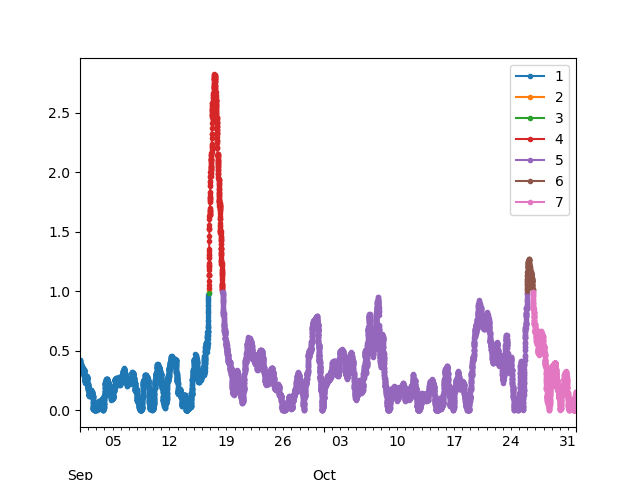

In [13]:
fig = plt.figure()
for g in data.groupby("Group"):
    g[1]["Difference"].plot(marker=".", label=f"{g[0]}")
    # if g[0] == 2:
    # g[1]['Difference'].plot(marker='o', label=f'{g[0]}')
plt.legend()

### Summary of method

1. True false flag if residual level above trigger threshold (T).
2. Create groups between each switch between over/under threshold
3. Each under-threshold group Group is joined with surrounding groups if:

    a. **Lull period (L)** - If duration of group less than "lull" duration L. Default = 6h = 21600s.
    
    b. **Continuation threshold (C)** - If values in the group do not drop below secondary "continuity" threshold C, usually specified as a ratio of the target threshold. Default = 0.9T.
    
   Else the grouping is considered to be a separator between distinct events.
   
4. For each found grouping:

    a. **Shoulder Rule (S)** - include time periods before and after event - Include data S hours before and after identified event (measured by crossing of continuity threshold). Default = 12h = 43200s
    
    b. **Chute Rule (R)** - Include water levels that are below thresholds but considered part of onset and return of surge event -> So include R steps before and after storm surge event (after dropping below continuity threshold). Default = 9.

In [22]:
trigger_thresold = 1.0
continuity_thresold = 0.9
lull_duration = 21600
shoulder_period = 43200
chute_rule = 9

In [23]:
events = noaa.wicks_2017_algo(nome_data, trigger_threshold=trigger_threshold, lull_duration=lull_duration, continuity_threshold=continuity_thresold, shoulder_period=shoulder_period, chute_rule=chute_rule, interactive=False)

len(events), events[0][0:5][["Water Level", "Prediction", "Difference"]]

(2,
                      Water Level  Prediction  Difference
 Date Time                                               
 2022-09-16 06:30:00        0.471       0.054       0.417
 2022-09-16 06:36:00        0.483       0.060       0.423
 2022-09-16 06:42:00        0.495       0.066       0.429
 2022-09-16 06:48:00        0.529       0.072       0.457
 2022-09-16 06:54:00        0.520       0.077       0.443)

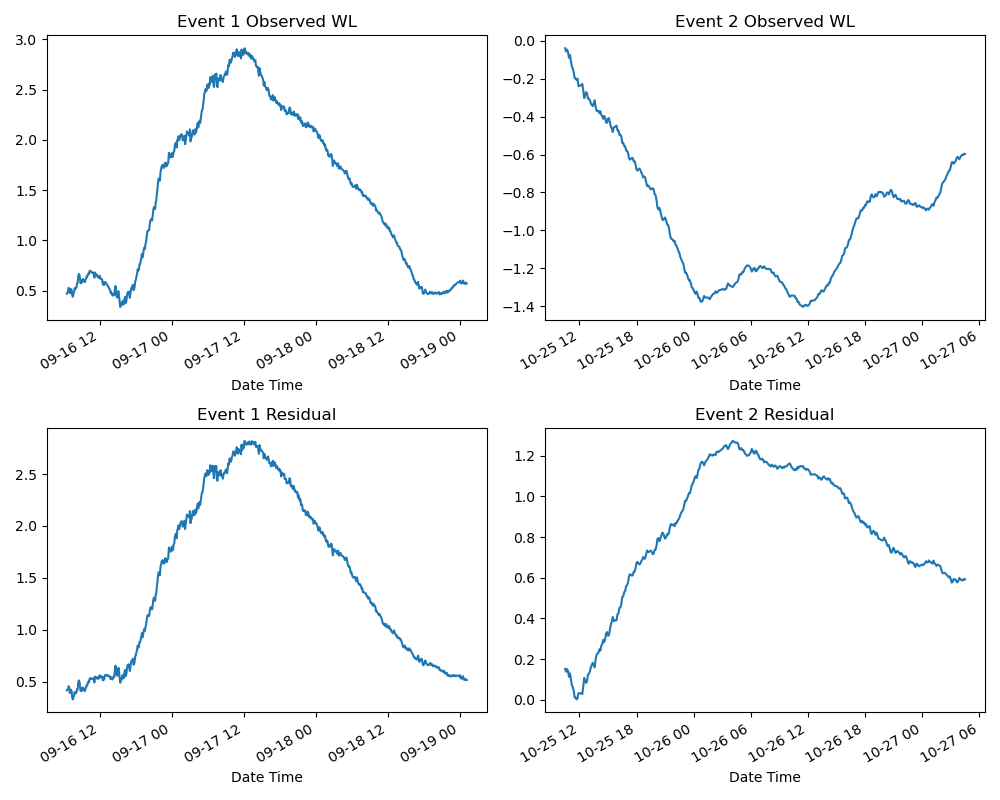

In [24]:
fig = plt.figure(figsize=(10, 8))

for i, e in enumerate(events):
    ax = fig.add_subplot(2, len(events), i + 1)
    e["Water Level"].plot(ax=ax)
    ax.set_title(f"Event {i+1} Observed WL")
    ax = fig.add_subplot(2, len(events), 2 + i + 1)
    e["Difference"].plot(ax=ax)
    ax.set_title(f"Event {i+1} Residual")

fig.tight_layout()

In [25]:
events = noaa.wicks_2017_algo(nome_data, trigger_threshold=1.0, interactive=True)

Storm Surge Event Found (18.9H) :                                                                   
Time:2022-09-16T11:18:00.000000000 - 2022-09-19T00:42:00.000000000                                  
 2.820m ┼                             ╭────╮
 2.538m ┤                      ╭──────╯    ╰─────╮
 2.256m ┤                    ╭─╯                 ╰──╮
 1.974m ┤                ╭───╯                      ╰────╮
 1.692m ┤             ╭──╯                               ╰────╮
 1.410m ┤           ╭─╯                                       ╰───╮
 1.128m ┤─────────╭─╯─────────────────────────────────────────────╰───╮─────────────────
 0.846m ┤────────╭╯───────────────────────────────────────────────────╰──────╮──────────
 0.564m ┤────────╯                                                           ╰───────
 0.282m ┤
 0.000m ┼───────────────────────────────────────────────────────────────────────────────




 ==== Keep event? (Y/N) ==== 
 T


Storm Surge Event Found (18.3H) :                                                                   
Time:2022-10-25T14:00:00.000000000 - 2022-10-27T04:18:00.000000000                                  
 1.265m ┼                        ╭────────╮
 1.138m ┤                    ╭───╯        ╰──────────────╮
 1.012m ┤─────────────────╭──╯───────────────────────────╰────╮─────────────────────────
 0.885m ┤──────────────╭──╯───────────────────────────────────╰────╮────────────────────
 0.759m ┤         ╭────╯                                           ╰─────╮
 0.632m ┤      ╭──╯                                                      ╰───────────
 0.506m ┤    ╭─╯
 0.380m ┤  ╭─╯
 0.253m ┤──╯
 0.126m ┤
 0.000m ┼───────────────────────────────────────────────────────────────────────────────




 ==== Keep event? (Y/N) ==== 
 Y


## Large Date Range

In [26]:
import importlib

importlib.reload(noaa)

<module 'pyadcirc.data.noaa' from '/home/jovyan/work/repos/pyadcirc/src/pyadcirc/data/noaa.py'>

In [27]:
begin_date = pd.to_datetime("19790101 00:00")
end_date = pd.to_datetime("20230101 00:01")

In [ ]:
nome_data_01_23 = noaa.pull_dataset(nome, begin_date=begin_date, end_date=end_date)

In [30]:
nome_data_full = nome_data_01_23.dropna()
nome_data_full

,Sigma,Water Level,Prediction
Date Time,,,
1992-10-01 03:00:00,0.000,-0.211,-0.131
1992-10-01 03:06:00,0.000,-0.201,-0.127
1992-10-01 03:12:00,0.000,-0.190,-0.123
1992-10-01 03:18:00,0.000,-0.179,-0.119
1992-10-01 03:24:00,0.000,-0.168,-0.114
...,...,...,...
2022-12-31 23:36:00,0.002,0.256,0.215
2022-12-31 23:42:00,0.002,0.247,0.216
2022-12-31 23:48:00,0.002,0.244,0.218


In [25]:
events = noaa.wicks_2017_algo(nome_data_01_23, trigger_threshold=1.0, interactive=False)

In [26]:
len(events), events[0]

(191,
                      Sigma  Water Level  Prediction  Difference  \
 Date Time                                                         
 2001-01-05 23:48:00    0.0       -0.229       0.168       0.397   
 2001-01-05 23:54:00    0.0       -0.230       0.170       0.400   
 2001-01-06 00:00:00    0.0       -0.235       0.171       0.406   
 2001-01-06 00:06:00    0.0       -0.234       0.172       0.406   
 2001-01-06 00:12:00    0.0       -0.240       0.173       0.413   
 ...                    ...          ...         ...         ...   
 2001-01-08 19:24:00    0.0       -0.115       0.076       0.191   
 2001-01-08 19:30:00    0.0       -0.111       0.073       0.184   
 2001-01-08 19:36:00    0.0       -0.107       0.070       0.177   
 2001-01-08 19:42:00    0.0       -0.108       0.067       0.175   
 2001-01-08 19:48:00    0.0       -0.109       0.065       0.174   
 
                      TriggerThreshold  ContinuityThreshold  Group  \
 Date Time                            

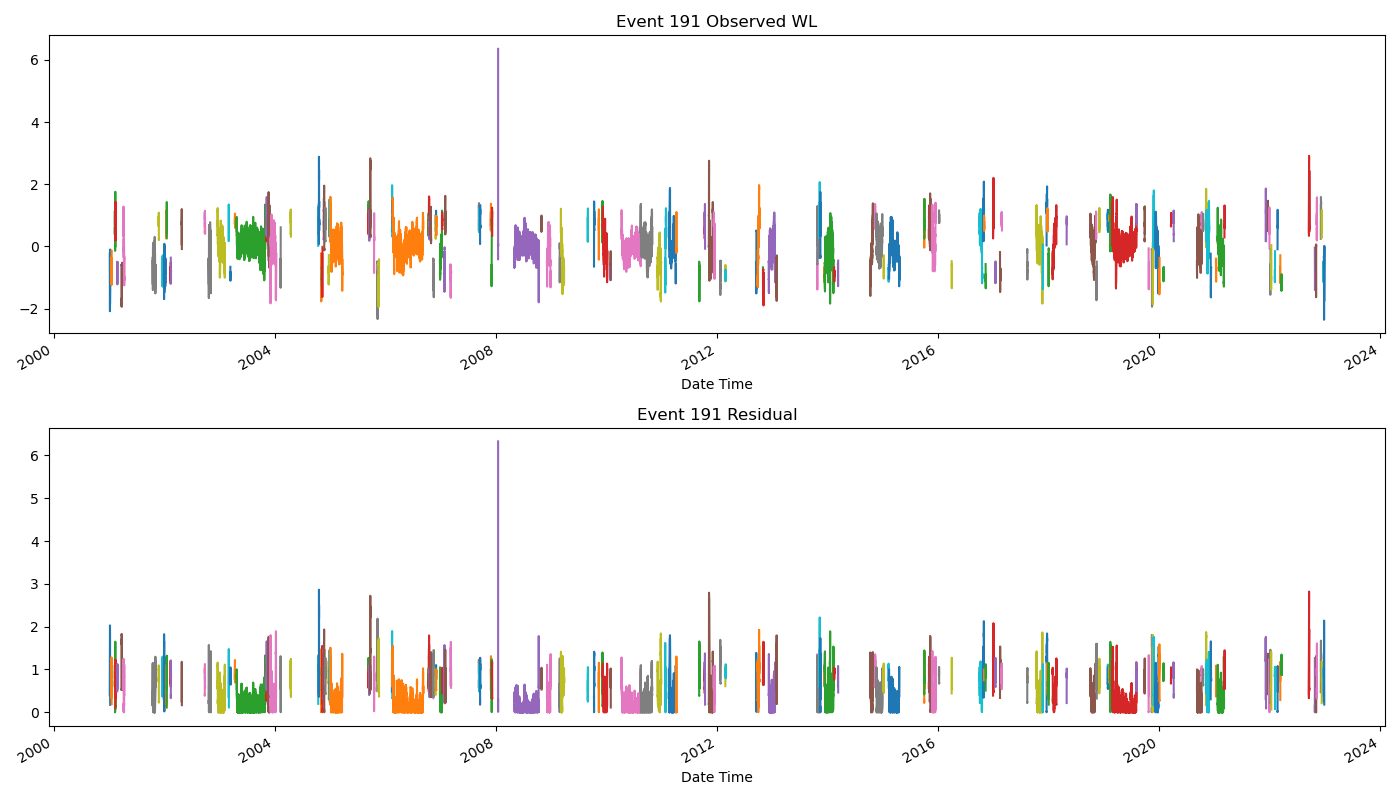

In [27]:
fig = plt.figure(figsize=(14, 8))
ax1 = fig.add_subplot(2, 1, 1)
ax2 = fig.add_subplot(2, 1, 2)

ne = len(events)
for i, e in enumerate(events[0:ne]):
    e["Water Level"].plot(ax=ax1)
    e["Difference"].plot(ax=ax2)

ax1.set_title(f"Event {i+1} Observed WL")
ax2.set_title(f"Event {i+1} Residual")

fig.tight_layout()

In [60]:
ak_stations = noaa.NOAA_STATIONS[noaa.NOAA_STATIONS["Region"] == "Alaska"]
ak_stations

,Region,ID,Name
9,Alaska,9450460,"Ketchikan, AK"
10,Alaska,9451054,"Port Alexander, AK"
11,Alaska,9451600,"Sitka, AK"
12,Alaska,9452210,"Juneau, AK"
13,Alaska,9452400,"Skagway, Taiya Inlet, AK"
14,Alaska,9452634,"Elfin Cove, AK"
15,Alaska,9453220,"Yakutat, Yakutat Bay, AK"
16,Alaska,9454050,"Cordova, AK"
17,Alaska,9454240,"Valdez, AK"
18,Alaska,9455090,"Seward, AK"


# Main Alaska Stations

## 9468756	Nome , AK

In [6]:
importlib.reload(noaa)

<module 'pyadcirc.data.noaa' from '/home/jovyan/work/repos/pyadcirc/src/pyadcirc/data/noaa.py'>

### Station Meta-Data

In particular we go to the link to see that the station has been in operation since July of 1992.

In [7]:
nome = 9468756
noaa.get_station_metadata(nome), (f"https://tidesandcurrents.noaa.gov/stationhome.html?id={nome}")

({'name': 'Nome, Norton Sound',
  'id': 9468756,
  'coords': [194.560361, 64.494611]},
 'https://tidesandcurrents.noaa.gov/stationhome.html?id=9468756')

### Raw NOAA API Station Data

In [8]:
begin_date = pd.to_datetime("19920101 00:00")
end_date = pd.to_datetime("20230101 00:01")
# begin_date = pd.to_datetime("20000101 00:01")
# end_date = pd.to_datetime("20010101 00:01")

In [9]:
data_results = noaa.pull_dataset(nome, begin_date=begin_date, end_date=end_date)

In [10]:
data_results

,Sigma,Water Level,Prediction,Quality
Date Time,,,,
1992-08-20 00:00:00,NaN,NaN,0.134,p
1992-08-20 00:06:00,NaN,NaN,0.130,p
1992-08-20 00:12:00,NaN,NaN,0.125,p
1992-08-20 00:18:00,NaN,NaN,0.121,p
1992-08-20 00:24:00,NaN,NaN,0.116,p
...,...,...,...,...
2022-12-31 23:36:00,0.002,0.256,0.215,p
2022-12-31 23:42:00,0.002,0.247,0.216,p
2022-12-31 23:48:00,0.002,0.244,0.218,p


### Determining valid chunks of data

To get a valid chunk of data need to have good measurements - i.e. good 'Water Level' measurements.
Predictions will always exist based off of NOAA's models. 
Water Levels may or may not exist, and may or may not be verified ('Quality' == 'v').
To get valid groups of data to scan for storm surge events we get continuous groups of data that have the following properties:

1. No NA 'Water Level' values
2. Quality == 'v' for the whole group (i.e. all Water Level values have been verified).
3. Duration of group is greater than 24 hours.

In [11]:
test = data_results.copy()
test = test[~test.index.duplicated(keep='first')]
test['No Data'] = test['Water Level'].isna()
test['Data Groups']  = test['No Data'].ne(test['No Data'].shift()).cumsum()
test['Group Size'] = test.groupby('Data Groups')['Prediction'].transform(len)
test['Group Duration'] = test['Group Size'] 
test['Duration (Hours)'] = (test['Group Size'] * 6.0)/60.0
test['Duration Flag'] = test['Duration (Hours)'] >= 24.0
test['Valid Group Flag'] = ~test['No Data'] & test['Duration Flag'] & (test['Quality'] == 'v')
test

,Sigma,Water Level,Prediction,Quality,No Data,Data Groups,Group Size,Group Duration,Duration (Hours),Duration Flag,Valid Group Flag
Date Time,,,,,,,,,,,
1992-08-20 00:00:00,NaN,NaN,0.134,p,True,1,4590,4590,459.0,True,False
1992-08-20 00:06:00,NaN,NaN,0.130,p,True,1,4590,4590,459.0,True,False
1992-08-20 00:12:00,NaN,NaN,0.125,p,True,1,4590,4590,459.0,True,False
1992-08-20 00:18:00,NaN,NaN,0.121,p,True,1,4590,4590,459.0,True,False
1992-08-20 00:24:00,NaN,NaN,0.116,p,True,1,4590,4590,459.0,True,False
...,...,...,...,...,...,...,...,...,...,...,...
2022-12-31 23:36:00,0.002,0.256,0.215,p,False,1776,70531,70531,7053.1,True,False
2022-12-31 23:42:00,0.002,0.247,0.216,p,False,1776,70531,70531,7053.1,True,False
2022-12-31 23:48:00,0.002,0.244,0.218,p,False,1776,70531,70531,7053.1,True,False


### Scanning for storm surge events by group

Now we scan for events by group using the algorithm from <cite id="z8488"><a href="#zotero%7C11450669%2F7F6J6S7U">(Wicks &#38; Atkinson, 2017)</a></cite>.


In [12]:
trigger_threshold = 1.0
continuity_thresold = 0.9
lull_duration = 21600
shoulder_period = 43200
chute_rule = 9

events = []
with alive_bar(int(test['Data Groups'].max()), dual_line=True, title='Finding Events', force_tty=True) as bar:
    for name, group in test.groupby('Data Groups'):
        if not group['Valid Group Flag'].all():
            bar.text = f'-> Group: {name} not valid, Skipping!'
            bar()
            pass
        else:
            bar.text = f'-> Group: {name} valid - Scanning...'
            try:
                group_events = noaa.wicks_2017_algo(
                    group,
                    trigger_threshold=trigger_threshold,
                    lull_duration=lull_duration,
                    continuity_threshold=continuity_thresold,
                    shoulder_period=shoulder_period,
                    chute_rule=chute_rule,
                    interactive=False,
                )
            except Exception as e:
                print(f'Group {name} of size {len(group)} gave error {e}')
                bar
                pass 
            bar.text = f'Group {name} found {len(group_events)} events'
            events = events + group_events
            bar()
len(events)

Finding Events |████████████▍                           | ▄▆█ 552/1776 [31%] in 0s (~1s, 1553.4/s)                      
Finding Events |█████████████████████████████████████▎  | ▅▇▇ 1655/1776 [93%] in 1s (~0s, 1868.8/s)                     
Finding Events |█████████████████████████████████████▎  | ▆█▆ 1655/1776 [93%] in 1s (~0s, 2049.6/s)                     
Finding Events |█████████████████████████████████████▎  | ▇▇▅ 1655/1776 [93%] in 1s (~0s, 2141.3/s)                     
Finding Events |█████████████████████████████████████▎  | █▆▄ 1655/1776 [93%] in 1s (~0s, 2172.9/s)                     
Finding Events |█████████████████████████████████████▍  | ▇▅▃ 1657/1776 [93%] in 1s (~0s, 2162.6/s)                     
Finding Events |█████████████████████████████████████▍  | ▆▄▂ 1657/1776 [93%] in 1s (~0s, 2119.2/s)                     
Finding Events |█████████████████████████████████████▍  | ▅▃▁ 1657/1776 [93%] in 1s (~0s, 2062.8/s)                     
Finding Events |████████████████

236

### Filtering by event length and plotting.

In [31]:
# Get events greater than 12 hours but less than days
len_filter = lambda x : True if (len(x) < (5 * 24 * 60) / 6) &  (len(x) > (12 * 60) / 6) else False
events_filtered = [e for e in events if len_filter(e)]

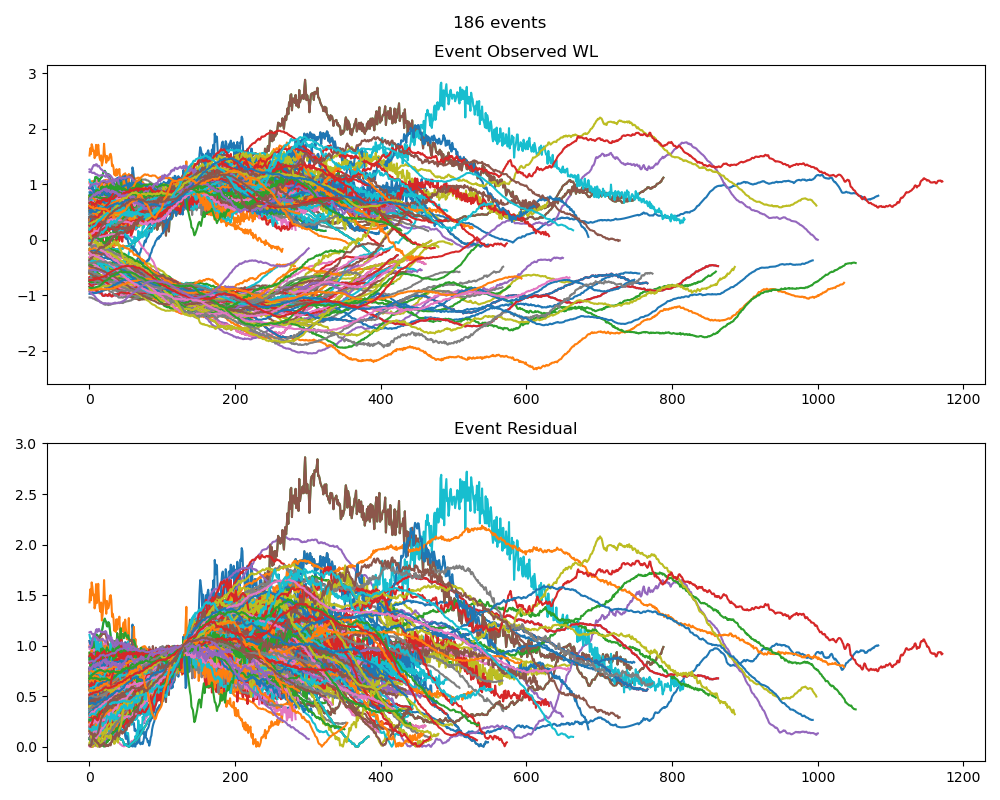

In [53]:
fig = plt.figure(figsize=(10, 8))
ax1 = fig.add_subplot(2, 1, 1)
ax2 = fig.add_subplot(2, 1, 2)

for idx, e in enumerate(events_filtered):
    e['Event ID'] = idx
    e['Type'] = 'Positive' if not np.abs(e['Water Level'].min()) > e['Water Level'].max() else 'Negative'
    ax1.plot(np.arange(0,len(e["Water Level"].values)), e["Water Level"].values)
    ax2.plot(np.arange(0,len(e["Difference"].values)), e["Difference"].values)
    # e["Water Level"].plot(ax=ax1)
    # e["Difference"].plot(ax=ax2)

ax1.set_title(f"Event Observed WL")
ax2.set_title(f"Event Residual")

plt.suptitle(f"{len(events_filtered)} events") 

fig.tight_layout()

In [54]:
all_events = pd.concat(events_filtered)
all_events['Date Time'] = all_events.index
all_events.set_index(['Event ID'], inplace=True)
all_events = all_events[['Type', 'Date Time', 'Prediction', 'Water Level', 'Sigma', 'Difference', 'Duration (Hours)']]
all_events

,Type,Date Time,Prediction,Water Level,Sigma,Difference,Duration (Hours)
Event ID,,,,,,,
0,Positive,1993-01-07 01:36:00,0.175,0.678,NaN,0.503,2243.0
0,Positive,1993-01-07 01:42:00,0.175,0.687,NaN,0.512,2243.0
0,Positive,1993-01-07 01:48:00,0.174,0.693,NaN,0.519,2243.0
0,Positive,1993-01-07 01:54:00,0.173,0.705,NaN,0.532,2243.0
0,Positive,1993-01-07 02:00:00,0.172,0.723,NaN,0.551,2243.0
...,...,...,...,...,...,...,...
185,Positive,2022-02-22 09:18:00,0.146,0.647,0.001,0.501,8735.0
185,Positive,2022-02-22 09:24:00,0.145,0.648,0.001,0.503,8735.0
185,Positive,2022-02-22 09:30:00,0.144,0.646,0.001,0.502,8735.0


In [62]:
num_negative = len(np.unique(all_events.index[all_events['Type'] == 'Negative']))
num_positive = len(np.unique(all_events.index)) - num_negative
num_negative,  num_positive

(61, 98)

## 9491094	Red Dog Dock, AK

### Station Meta-Data

In particular we go to the link to see that the station has been in operation since August of 2003.

In [63]:
rdd = 9491094
noaa.get_station_metadata(rdd), (f"https://tidesandcurrents.noaa.gov/stationhome.html?id={rdd}")

({'name': 'Red Dog Dock', 'id': 9491094, 'coords': [195.935611, 67.575806]},
 'https://tidesandcurrents.noaa.gov/stationhome.html?id=9491094')

In [64]:
begin_date = pd.to_datetime("20030101 00:00")
end_date = pd.to_datetime("20230101 00:01")

In [65]:
rdd_data_results = noaa.pull_dataset(rdd, begin_date=begin_date, end_date=end_date)

In [68]:
rdd_data_results

,Sigma,Water Level,Prediction,Quality
Date Time,,,,
2003-08-21 00:00:00,NaN,NaN,0.206,p
2003-08-21 00:06:00,NaN,NaN,0.206,p
2003-08-21 00:12:00,NaN,NaN,0.205,p
2003-08-21 00:18:00,NaN,NaN,0.204,p
2003-08-21 00:24:00,NaN,NaN,0.203,p
...,...,...,...,...
2022-11-27 00:30:00,0.009,0.225,0.017,v
2022-11-27 00:36:00,0.010,0.210,0.021,v
2022-11-27 00:42:00,0.015,0.247,0.025,v


### Compiling Dataset


In [70]:
def compile_dataset(data_results):
    test = data_results.copy()
    test = test[~test.index.duplicated(keep='first')]
    test['No Data'] = test['Water Level'].isna()
    test['Data Groups']  = test['No Data'].ne(test['No Data'].shift()).cumsum()
    test['Group Size'] = test.groupby('Data Groups')['Prediction'].transform(len)
    test['Group Duration'] = test['Group Size'] 
    test['Duration (Hours)'] = (test['Group Size'] * 6.0)/60.0
    test['Duration Flag'] = test['Duration (Hours)'] >= 24.0
    test['Valid Group Flag'] = ~test['No Data'] & test['Duration Flag'] & (test['Quality'] == 'v')
    
    trigger_threshold = 1.0
    continuity_thresold = 0.9
    lull_duration = 21600
    shoulder_period = 43200
    chute_rule = 9

    events = []
    for name, group in test.groupby('Data Groups'):
        if not group['Valid Group Flag'].all():
            pass
        else:
            try:
                group_events = noaa.wicks_2017_algo(
                    group,
                    trigger_threshold=trigger_threshold,
                    lull_duration=lull_duration,
                    continuity_threshold=continuity_thresold,
                    shoulder_period=shoulder_period,
                    chute_rule=chute_rule,
                    interactive=False,
                )
                events = events + group_events
            except Exception as e:
                pass 
            
    # Get events greater than 12 hours but less than days
    len_filter = lambda x : True if (len(x) < (5 * 24 * 60) / 6) &  (len(x) > (12 * 60) / 6) else False
    events_filtered = [e for e in events if len_filter(e)]
    
    for idx, e in enumerate(events_filtered):
        e['Event ID'] = idx
        e['Type'] = 'Positive' if not np.abs(e['Water Level'].min()) > e['Water Level'].max() else 'Negative'
        
    all_events = pd.concat(events_filtered)
    all_events['Date Time'] = all_events.index
    all_events.set_index(['Event ID'], inplace=True)
    all_events = all_events[['Type', 'Date Time', 'Prediction', 'Water Level', 'Sigma', 'Difference', 'Duration (Hours)']]
    
    return all_events

In [71]:
rdd_events = compile_dataset(rdd_data_results)

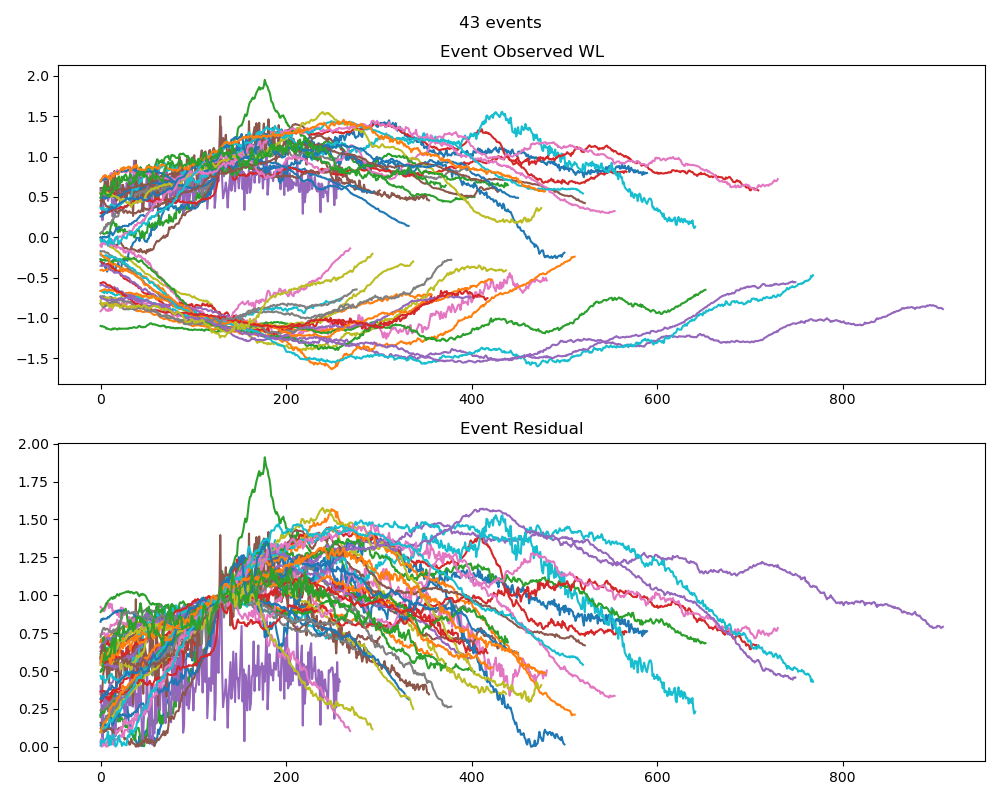

In [78]:
len(rdd_events)
fig = plt.figure(figsize=(10, 8))
ax1 = fig.add_subplot(2, 1, 1)
ax2 = fig.add_subplot(2, 1, 2)

for name, e in rdd_events.groupby('Event ID'):
    ax1.plot(np.arange(0,len(e["Water Level"].values)), e["Water Level"].values)
    ax2.plot(np.arange(0,len(e["Difference"].values)), e["Difference"].values)
    # e["Water Level"].plot(ax=ax1)
    # e["Difference"].plot(ax=ax2)

ax1.set_title(f"Event Observed WL")
ax2.set_title(f"Event Residual")

plt.suptitle(f"{len(np.unique(rdd_events.index))} events") 

fig.tight_layout()

## 9468333 Unalakleet, AK

### Station Meta-Data

In particular we go to the link to see that the station has been in operation since May 01, 2011

In [2]:
una = 9468333
noaa.get_station_metadata(una), (f"https://tidesandcurrents.noaa.gov/stationhome.html?id={una}")

({'name': 'Unalakleet', 'id': 9468333, 'coords': [199.2157, 63.871361]},
 'https://tidesandcurrents.noaa.gov/stationhome.html?id=9468333')

In [3]:
begin_date = pd.to_datetime("20110501 00:00")
end_date = pd.to_datetime("20230101 00:01")

In [9]:
una_events = noaa.get_event_dataset(una, begin_date=begin_date, end_date=end_date)

Group 16 of size 1405 threw error index 0 is out of bounds for axis 0 with size 0                                       
> /home/jovyan/work/repos/pyadcirc/src/pyadcirc/data/noaa.py(677)get_event_dataset()
    675                 print(f'Group {name} of size {len(group)} threw error {e}')
    676                 pdb.set_trace()
--> 677                 pass
    678 
    679     # Get events greater than 12 hours but less than days



ipdb>  c


In [10]:
una_events

,Type,Date Time,Prediction,Water Level,Sigma,Difference,Duration (Hours)
Event ID,,,,,,,
0,Positive,2011-08-04 23:36:00,-0.189,-0.538,0.001,0.349,1821.1
0,Positive,2011-08-04 23:42:00,-0.178,-0.531,0.002,0.353,1821.1
0,Positive,2011-08-04 23:48:00,-0.166,-0.523,0.002,0.357,1821.1
0,Positive,2011-08-04 23:54:00,-0.154,-0.517,0.002,0.363,1821.1
0,Positive,2011-08-05 00:00:00,-0.142,-0.506,0.004,0.364,1821.1
...,...,...,...,...,...,...,...
60,Positive,2022-03-06 01:18:00,0.174,0.278,0.001,0.104,8735.0
60,Positive,2022-03-06 01:24:00,0.174,0.276,0.000,0.102,8735.0
60,Positive,2022-03-06 01:30:00,0.173,0.276,0.001,0.103,8735.0


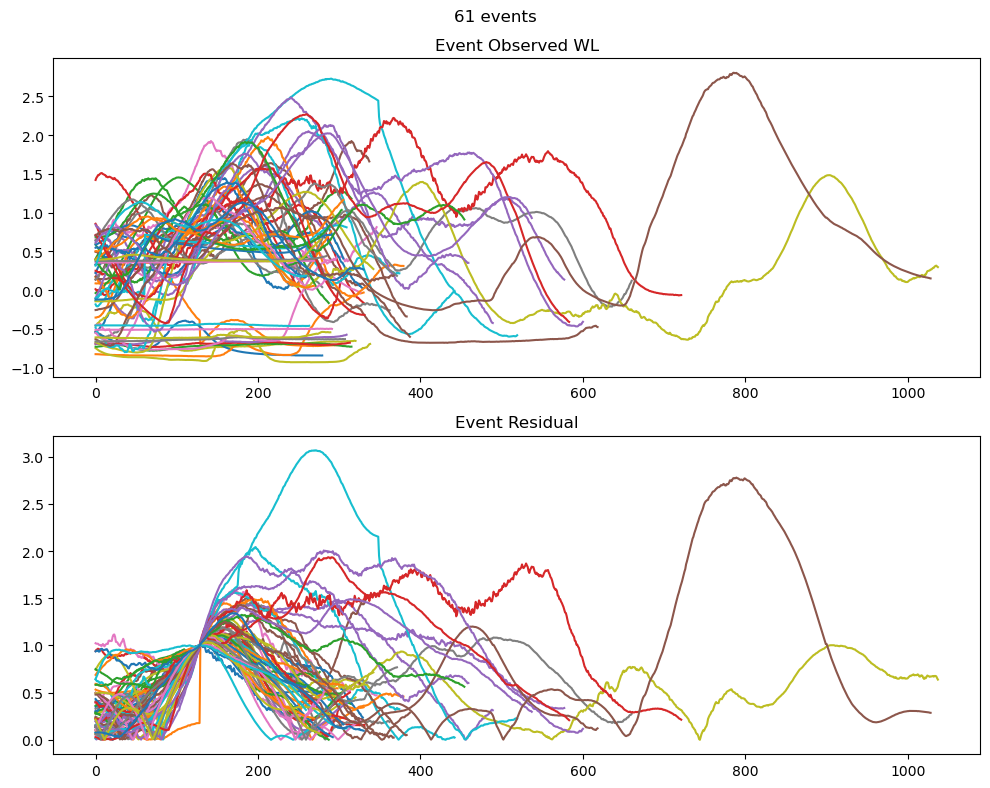

In [11]:
fig = plt.figure(figsize=(10, 8))
ax1 = fig.add_subplot(2, 1, 1)
ax2 = fig.add_subplot(2, 1, 2)

for name, e in una_events.groupby('event id'):
    ax1.plot(np.arange(0,len(e["water level"].values)), e["water level"].values)
    ax2.plot(np.arange(0,len(e["difference"].values)), e["difference"].values)
    # e["water level"].plot(ax=ax1)
    # e["difference"].plot(ax=ax2)

ax1.set_title(f"event observed wl")
ax2.set_title(f"event residual")

plt.suptitle(f"{len(np.unique(una_events.index))} events") 

fig.tight_layout()

# Other Alaska Stations

Other more tidally dominant Alaska NOAA stations:

## 9450460	Ketchikan, AK


In [12]:
ketchikan = 9450460
noaa.get_station_metadata(ketchikan), (f"https://tidesandcurrents.noaa.gov/stationhome.html?id={ketchikan}")

({'name': 'Ketchikan', 'id': 9450460, 'coords': [228.373889, 55.331944]},
 'https://tidesandcurrents.noaa.gov/stationhome.html?id=9450460')

In [13]:
begin_date = "1990-06-20 00:00:00"
end_date = "2023-01-01 00:00:00"

In [18]:
importlib.reload(noaa)

<module 'pyadcirc.data.noaa' from '/home/jovyan/work/repos/pyadcirc/src/pyadcirc/data/noaa.py'>

In [20]:
ketchikan_raw_data, ketchikan_events = noaa.get_event_dataset(ketchikan, begin_date=begin_date, end_date=end_date)

In [24]:
ketchikan_events

,Type,Date Time,Prediction,Water Level,Sigma,Difference,Duration (Hours)
Event ID,,,,,,,
0,Positive,2007-07-16 18:00:00,0.218,0.301,0.012,0.083,8735.0
0,Positive,2007-07-16 18:06:00,0.112,0.194,0.018,0.082,8735.0
0,Positive,2007-07-16 18:12:00,0.005,0.076,0.012,0.071,8735.0
0,Positive,2007-07-16 18:18:00,-0.101,-0.028,0.013,0.073,8735.0
0,Positive,2007-07-16 18:24:00,-0.206,-0.146,NaN,0.060,8735.0
...,...,...,...,...,...,...,...
1,Positive,2007-07-18 23:42:00,-1.298,-1.107,0.000,0.191,8735.0
1,Positive,2007-07-18 23:48:00,-1.237,-1.048,0.000,0.189,8735.0
1,Positive,2007-07-18 23:54:00,-1.172,-0.979,0.010,0.193,8735.0


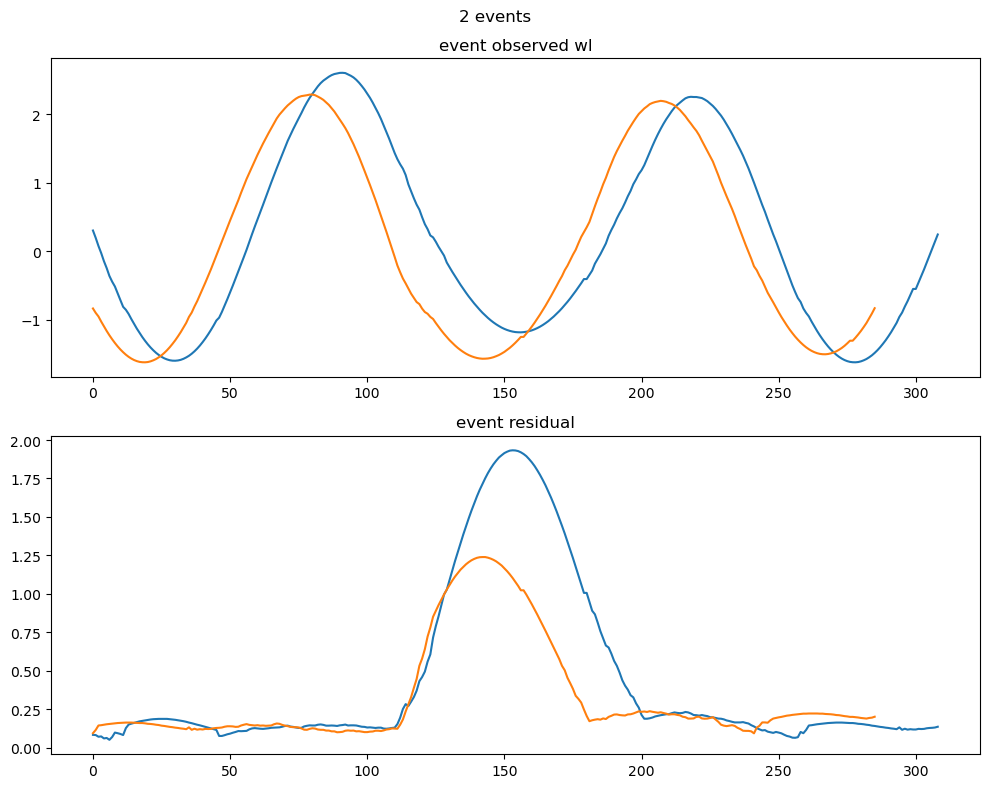

In [26]:
fig = plt.figure(figsize=(10, 8))
ax1 = fig.add_subplot(2, 1, 1)
ax2 = fig.add_subplot(2, 1, 2)

for name, e in ketchikan_events.groupby('Event ID'):
    ax1.plot(np.arange(0,len(e["Water Level"].values)), e["Water Level"].values)
    ax2.plot(np.arange(0,len(e["Difference"].values)), e["Difference"].values)
    # e["water level"].plot(ax=ax1)
    # e["difference"].plot(ax=ax2)

ax1.set_title(f"event observed wl")
ax2.set_title(f"event residual")

plt.suptitle(f"{len(np.unique(ketchikan_events.index))} events") 

fig.tight_layout()